In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d 

from spikingDataUtilities import loadMATData, firingRate

In [2]:
data = loadMATData('/home/gabricasa/code_repo/BrainHack2026/session1.mat')

In [ ]:
firing_rate = firingRate(data['spikes_hpc'][:,0])
gaussian_firing_rate = gaussian_filter1d(firing_rate[:,1],sigma=1.5,axis=0)

#time = int(0.05 * 10000)
#plt.plot(firing_rate[:,0][:time], firing_rate[:,1][:time])
#plt.plot(firing_rate[:,0][:time], gaussian_firing_rate[:time])
#plt.show()

In [ ]:
firing_rate_hpc = firingRate(data['spikes_hpc'][:,0], smoothed=True)
firing_rate_pfc = firingRate(data['spikes_pfc'][:,0], smoothed=True)
firing_rate_nr = firingRate(data['spikes_nr'][:,0], smoothed=True)

In [ ]:
#plt.plot(firing_rate_hpc[:,0][:500],firing_rate_hpc[:,1][:500])
#plt.plot(firing_rate_pfc[:,0][:500],firing_rate_pfc[:,1][:500])
time_mask = (firing_rate_hpc[:,0] >= data['protocol_times'][0][0]) & (firing_rate_hpc[:,0] <= data['protocol_times'][0][-1])
plt.plot(firing_rate_hpc[:,0][time_mask],firing_rate_hpc[:,1][time_mask])
plt.show()

# Sleep1

In [3]:
firing_rate_hpc = firingRate(data['spikes_hpc'][:,0], smooth=True)
firing_rate_pfc = firingRate(data['spikes_pfc'][:,0], smooth=True)
firing_rate_nr = firingRate(data['spikes_nr'][:,0], smooth=True)

time_mask = (firing_rate_hpc[:,0] >= data['protocol_times'][0][0]) & (firing_rate_hpc[:,0] <= data['protocol_times'][0][-1])
s1_hpc_rate = firing_rate_hpc[:,1][time_mask]
s1_hpc_times = firing_rate_hpc[:,0][time_mask]
s1_pfc_rate = firing_rate_pfc[:,1][time_mask]
s1_pfc_times = firing_rate_pfc[:,0][time_mask]
s1_nr_rate = firing_rate_nr[:,1][time_mask]
s1_nr_times = firing_rate_nr[:,0][time_mask]

In [37]:
# REM intervals within sleep 1, exclude 1st and last REM
# Draw random number of intervals (same as number of ripples in S1) for control, then drawn uniformly within those intervals
rem_intervals = int(np.max(np.where(data['rem'][:,1] <= data['protocol_times'][0][-1])[-1]))-1
rnd_size = len(np.where(data['ripples'] < data['protocol_times'][0][-1])[1])

rnd_indexes = np.random.choice(np.arange(1,rem_intervals), size=rnd_size)
u = np.random.uniform(0,1, size=rnd_size)

starts = data['rem'][rnd_indexes,0]
ends = data['rem'][rnd_indexes,1]
test_times = starts + u * (ends - starts)

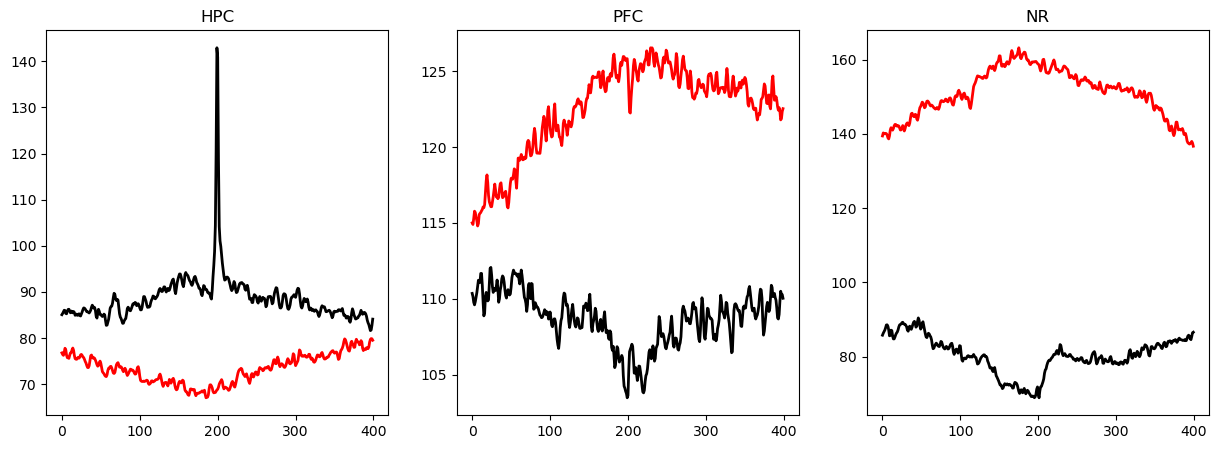

In [38]:
# Check activity in the 3 different regions around hippocampal ripples
i, j, k = 0, 0, 0
t_width = 10  # time window around ripple in seconds
sum_hpc = []
sum_nr = []
sum_pfc = []
rnd_sum_hpc = []
rnd_sum_nr = []
rnd_sum_pfc = []

# Create subplots for each region
fig, ax = plt.subplots(1,3, figsize=(15,5))

while data['ripples'][i] < data['protocol_times'][0][-1]:
    red_mask = (s1_hpc_times > data['ripples'][i]-t_width) & (s1_hpc_times < data['ripples'][i]+t_width)
    rnd_mask = (s1_hpc_times > test_times[i]-t_width) & (s1_hpc_times < test_times[i]+t_width)
    #plt.plot(s1_hpc_rate[red_mask])
    sum_hpc.append(s1_hpc_rate[red_mask])
    rnd_sum_hpc.append(s1_hpc_rate[rnd_mask])
    i += 1
avg_hpc = np.mean(sum_hpc, axis=0)
rnd_avg_hpc =  np.mean(rnd_sum_hpc, axis=0)
ax[0].plot(avg_hpc, color='black', linewidth=2)
ax[0].plot(rnd_avg_hpc, color='red', linewidth=2)
ax[0].set_title('HPC')

while data['ripples'][j] < data['protocol_times'][0][-1]:
    red_mask = (s1_pfc_times > data['ripples'][j]-t_width) & (s1_pfc_times < data['ripples'][j]+t_width)
    rnd_mask = (s1_pfc_times > test_times[j]-t_width) & (s1_pfc_times < test_times[j]+t_width)
    #plt.plot(s1_pfc_rate[red_mask])
    sum_pfc.append(s1_pfc_rate[red_mask])
    rnd_sum_pfc.append(s1_pfc_rate[rnd_mask])
    j += 1
avg_pfc = np.mean(sum_pfc, axis=0)
rnd_avg_pfc = np.mean(rnd_sum_pfc, axis=0)
ax[1].plot(avg_pfc, color='black', linewidth=2)
ax[1].plot(rnd_avg_pfc, color='red', linewidth=2)
ax[1].set_title('PFC')

while data['ripples'][k] < data['protocol_times'][0][-1]:
    red_mask = (s1_nr_times > data['ripples'][k]-t_width) & (s1_nr_times < data['ripples'][k]+t_width)
    rnd_mask = (s1_nr_times > test_times[k]-t_width) & (s1_nr_times < test_times[k]+t_width)
    #plt.plot(s1_nr_rate[red_mask])
    sum_nr.append(s1_nr_rate[red_mask])
    rnd_sum_nr.append(s1_nr_rate[rnd_mask])
    k += 1
avg_nr = np.mean(sum_nr, axis=0)
rnd_avg_nr = np.mean(rnd_sum_nr, axis=0)
ax[2].plot(rnd_avg_nr, color='red', linewidth=2)
ax[2].plot(avg_nr, color='black', linewidth=2)
ax[2].set_title('NR')

plt.show()